In [2]:
import os
import numpy as np
import scanpy as sc
import scvi

In [3]:
#multi-tissue-single-cell-tumor-atlas
dataset_url = 'https://datasets.cellxgene.cziscience.com/07405240-4f64-4dd9-83c3-b3db3405b05c.h5ad'

In [5]:
adata_path = os.path.join('data/raw', "tumor_atlas.h5ad")

adata = sc.read(
    adata_path,
    backup_url=dataset_url,
)

In [10]:
adata.obs[['tissue_type', 'disease', 'organism', 'tissue', 'batch', 'author_first_cell_type', 'author_cell_type', 'cell_type', 'assay', 'disease', 'organism', 'sex',
       'tissue']]

,tissue_type,disease,organism,tissue,batch,author_first_cell_type,author_cell_type,cell_type,assay,disease,organism,sex,tissue
BT1299_GTACTCCTCGGAAACG-1-17,tissue,lung cancer,Homo sapiens,lung,0,Endothelial Cells,Endothelial,endothelial cell,10x 3' v2,lung cancer,Homo sapiens,male,lung
BT1299_GTACTTTAGCAGGCTA-1-17,tissue,lung cancer,Homo sapiens,lung,0,Mononuclear Phagocytes,Mac_Rec,mononuclear phagocyte,10x 3' v2,lung cancer,Homo sapiens,male,lung
BT1299_GTACTTTAGCATGGCA-1-17,tissue,lung cancer,Homo sapiens,lung,0,Endothelial Cells,Endothelial,endothelial cell,10x 3' v2,lung cancer,Homo sapiens,male,lung
BT1299_GTACTTTAGGATGTAT-1-17,tissue,lung cancer,Homo sapiens,lung,0,B Cells,B_cells,B cell,10x 3' v2,lung cancer,Homo sapiens,male,lung
BT1299_GTACTTTAGGCTCTTA-1-17,tissue,lung cancer,Homo sapiens,lung,0,Malignant Cells,lung_tumor,malignant cell,10x 3' v2,lung cancer,Homo sapiens,male,lung
...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3_6_GTGCAGCTCATGTCCC-1-3,tissue,normal,Homo sapiens,lung,0,Epithelial Cells,lung_normal,epithelial cell,10x 3' v2,normal,Homo sapiens,female,lung
P3_6_GTTCGGGTCGGATGGA-1-3,tissue,normal,Homo sapiens,lung,0,Epithelial Cells,lung_normal,epithelial cell,10x 3' v2,normal,Homo sapiens,female,lung
P3_6_TAAGCGTTCAATCACG-1-3,tissue,normal,Homo sapiens,lung,0,Epithelial Cells,lung_normal,epithelial cell,10x 3' v2,normal,Homo sapiens,female,lung
P3_6_TACTTACGTTGATTGC-1-3,tissue,normal,Homo sapiens,lung,0,Epithelial Cells,lung_normal,epithelial cell,10x 3' v2,normal,Homo sapiens,female,lung


In [ ]:
# Filtramos apenas tissue blood and breast de 391963 total o subset ficou com ≠662 observações;
# Em sangue todas as amostras são disease normal;
# Em cancer de mama temos 2 tipos de doenças: normal e tumor; 
# Nas amostras de sangue temos 2mil amostras só parece pouco não sabemos se é o suficiente para treinar um modelo;

filtred_dataset = adata[adata.obs['tissue'].isin(['breast'])]

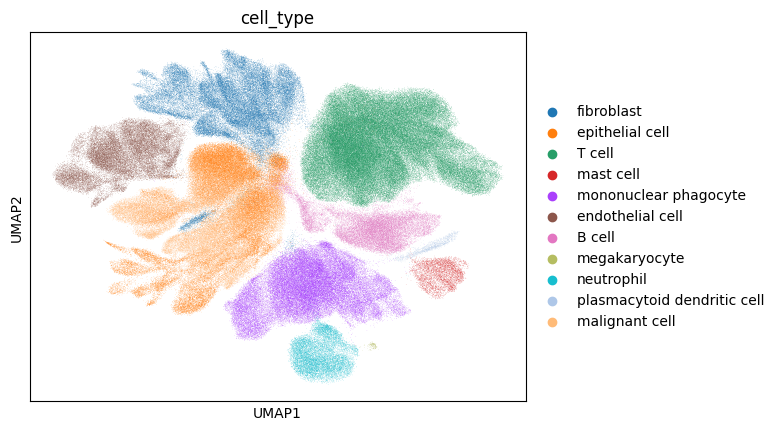

In [36]:
sc.pl.umap(adata, color="cell_type")

[02/23/25 21:10:49] WARNING  /Users/victor.apolonio/.pyenv/versions/3.12.0/lib/python3.12/site-pack ]8;id=423351;file:///Users/victor.apolonio/.pyenv/versions/3.12.0/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=303512;file:///Users/victor.apolonio/.pyenv/versions/3.12.0/lib/python3.12/warnings.py#109\109]8;;\
                             ages/scanpy/plotting/_utils.py:488: ImplicitModificationWarning:                      
                             Trying to modify attribute `._uns` of view, initializing view as                      
                             actual.                                                                               
                               adata.uns[value_to_plot + "_colors"] = colors_list                                  
                                                                                                                   

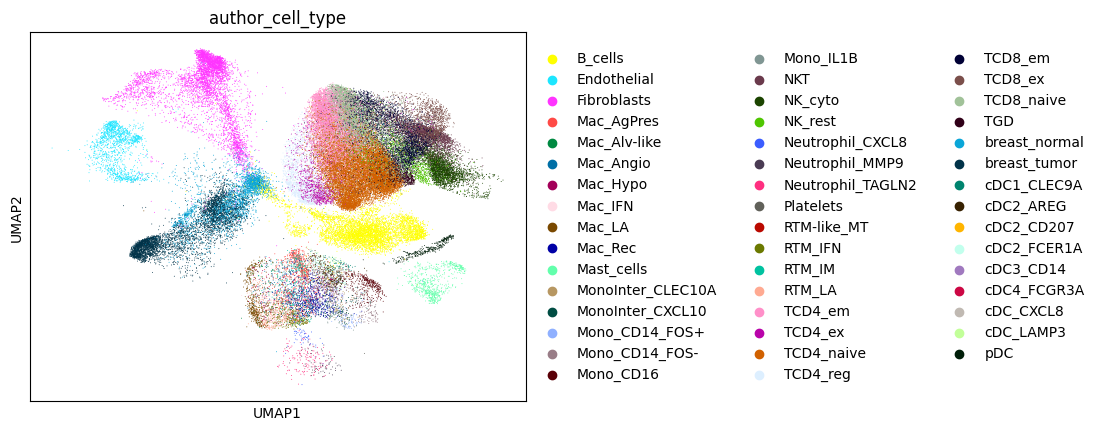

In [47]:
sc.pl.umap(filtred_dataset, color="author_cell_type")

In [57]:
just_breast = adata.obs[(adata.obs['tissue'] == 'breast')]

In [50]:
filtred_dataset.obs['author_cell_type'].value_counts()


author_cell_type
TCD4_naive           14641
TCD4_em               6155
B_cells               5606
Fibroblasts           5082
TCD8_naive            4962
breast_tumor          4214
TCD8_em               3364
breast_normal         3325
NK_cyto               2681
NKT                   2554
TCD4_reg              1948
Endothelial           1456
TCD8_ex               1366
TCD4_ex               1192
NK_rest               1102
Mac_AgPres             765
Mast_cells             679
Mac_Rec                585
TGD                    535
Mac_LA                 517
RTM_LA                 401
RTM_IM                 388
Mono_CD16              365
RTM_IFN                354
cDC2_AREG              334
pDC                    323
Mac_IFN                242
Mac_Angio              212
cDC2_FCER1A            210
MonoInter_CXCL10       207
MonoInter_CLEC10A      202
cDC3_CD14              184
Neutrophil_TAGLN2      150
Mono_CD14_FOS-         148
Mono_CD14_FOS+         124
Mac_Hypo                91
Mono_IL1B 

In [56]:
adata.obs['author_cell_type'].value_counts()


author_cell_type
Fibroblasts              48158
TCD4_naive               29724
Endothelial              28775
uveal melanoma_normal    23628
B_cells                  22058
TCD4_em                  18950
uveal melanoma_tumor     18137
lung_normal              15566
TCD8_ex                  13113
ovary_tumor              12277
TCD8_em                  10859
NK_cyto                  10609
TCD8_naive               10354
TCD4_reg                  9956
lung_tumor                9595
Mac_Alv-like              8813
Neutrophil_TAGLN2         6570
ovary_normal              6361
NKT                       6281
Mast_cells                4534
TCD4_ex                   4466
NK_rest                   4453
breast_tumor              4214
Mac_Rec                   4063
Neutrophil_MMP9           4024
Mac_AgPres                3949
colorectal_normal         3694
RTM_LA                    3569
RTM_IM                    3504
breast_normal             3325
Mac_Angio                 3099
skin_normal          

In [64]:
# Vamos repensar o modelo de filtragem dos dados, iremos identificar todos os autor_cell_type disponiveis nas amostras de mama, e criaremos um dataset final com todos esses tipos de celulas 
# independente do tecido de origem (validar isso eventualmente com os professores)

# adata[adata.obs['author_cell_type'] == adata[adata.obs['tissue'].isin(['breast'])].obs['author_cell_type']]


subsetadata = adata[adata.obs['author_cell_type'].isin(adata[adata.obs['tissue'] == 'breast'].obs['author_cell_type'])]

[02/23/25 21:37:10] WARNING  /Users/victor.apolonio/.pyenv/versions/3.12.0/lib/python3.12/site-pack ]8;id=23466;file:///Users/victor.apolonio/.pyenv/versions/3.12.0/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=473326;file:///Users/victor.apolonio/.pyenv/versions/3.12.0/lib/python3.12/warnings.py#109\109]8;;\
                             ages/scanpy/plotting/_utils.py:488: ImplicitModificationWarning:                      
                             Trying to modify attribute `._uns` of view, initializing view as                      
                             actual.                                                                               
                               adata.uns[value_to_plot + "_colors"] = colors_list                                  
                                                                                                                   

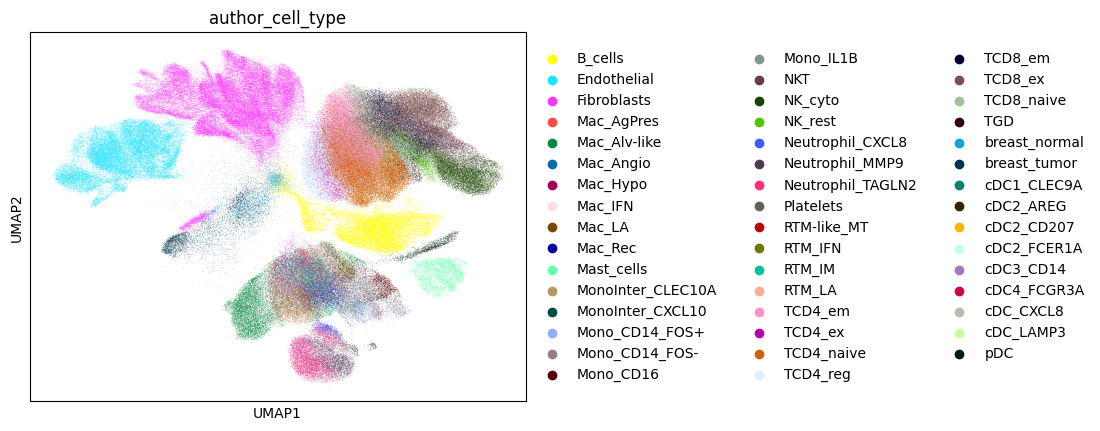

In [69]:
sc.pl.umap(subsetadata, color="author_cell_type")

In [70]:
subsetadata.obs['author_cell_type'].value_counts()


author_cell_type
Fibroblasts          48158
TCD4_naive           29724
Endothelial          28775
B_cells              22058
TCD4_em              18950
TCD8_ex              13113
TCD8_em              10859
NK_cyto              10609
TCD8_naive           10354
TCD4_reg              9956
Mac_Alv-like          8813
Neutrophil_TAGLN2     6570
NKT                   6281
Mast_cells            4534
TCD4_ex               4466
NK_rest               4453
breast_tumor          4214
Mac_Rec               4063
Neutrophil_MMP9       4024
Mac_AgPres            3949
RTM_LA                3569
RTM_IM                3504
breast_normal         3325
Mac_Angio             3099
Mono_CD14_FOS-        2150
RTM_IFN               2051
cDC2_AREG             2044
Mono_CD16             2018
Mac_IFN               1974
Mac_Hypo              1797
Mono_IL1B             1729
MonoInter_CLEC10A     1555
Mono_CD14_FOS+        1484
Neutrophil_CXCL8      1439
pDC                   1361
MonoInter_CXCL10      1231
Mac_LA    